## Vilnius real estate used Apartment market analysis

* Purpose: analyse Vilnius real estate pricing changes during Covid-19 and post-Covid period (est. 2020.05-2020.08)
* Hypothesis: The uncertainty brought by Covid-19 should bring fluctuations in Vilnius real estate selling and renting markets.
* Predictions:
  * 1. Increase in supply for apartments selling due to short-term rent demand drop.
  * 2. Decrease in prices due to plummeting demand and increase of supply due to point one.

* Scope: data from one of main the Lithuanian real estate market portals used.
* Data loaded weekly to monitor market changes.
* New apartments (year > 2019) are excluded from analysis as only partial data of their full supply and pricing are  available.
### Weak points
* The apartments being sold data is available from April. A better picture would have been having the data from as early as January.
* The apartments being rented data is available from May. A better picture would also require early data, such as start of 2020.
* Spikes in weeks' data possible. Preferred way would be to load data daily and smooth out edges with weekly averages. Daily scrapping is not possible however.
* There exists a practice of same apartment postings in multiple districts, that contributes to duplicate data. This duplicate data for the moment remains in dataset to support analysis splitting data into districts. 
* More sources could be included for analysis. This however can also result in duplicates.


### Importing initial preparation of data

In [1]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
from toai.imports import *
%matplotlib notebook
#import REP_Functions as rf

C:\Users\tiesi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\tiesi\Anaconda3\lib\site-packages\toai\imports.py:79: UserWarning: Could not find kaggle.json. Make sure it's located in C:\Users\tiesi\.kaggle. Or use the environment method.
  warnings.warn(str(error))


In [40]:
#load the raw data:
df_raw = pd.read_excel(r'C:\Users\tiesi\Class D\Vilnius-Real-Estate-market-exploration\Data.xlsx', index_col=0) 
#remove data from new apartments:
df_raw = df_raw[df_raw['year']< 2019]
#remove data from exceptionally big apartments(projects):
df_raw = df_raw[df_raw['space_sq_m']< 120]
#keep only selling apartments (type = 1)  data:
df_raw = df_raw[df_raw['type'] == 1]
#update column types:
df_raw['log_date'] = pd.to_datetime(df_raw['log_date'])

#create week column
df_raw['week'] = df_raw['log_date'].dt.week

#select the columns for analysis
df_raw_columns = [ 'log_date', 'district', 'street', 'year', 'total_price',
       'price_sq_m', 'nr_rooms', 'space_sq_m', 'floor', 'nr_floors', 'state', 'type', 'week']

df_raw = df_raw[df_columns]


In [41]:
#df_raw.shape

#df_raw[df_raw['log_date']=='2020-06-17']
# df = df_raw[0:1].copy()
# df = df.reset_index()
# df = df.drop(df.index[0])

#df = pd.DataFrame(data=None, columns=df_raw.columns,index=df_raw.index)
#pd.DataFrame().reindex_like(df)

# date = '2020-06-17'

# df_temp = df_raw[df_raw['log_date'] == date]
# df_temp = df_temp[(df_temp['price_sq_m'] > Q1 - 1.5 * IQR)]
# df_temp = df_temp[(df_temp['price_sq_m'] < Q3 + 1.5 * IQR)]
# print(df_temp.shape)
# df = df.append(df_temp)
# df.shape


ID
2             Ajerų g.
3        Antakalnio g.
4        Antakalnio g.
5        Antakalnio g.
6        Antakalnio g.
             ...      
74751       Vytauto g.
74752       Vytauto g.
74753       Vytauto g.
74754       Vytauto g.
74757       Vytauto g.
Name: street, Length: 31029, dtype: object

Working the outlayers
* Quantiles will be calculated individually for each day when the data was collected.
* Bottom 5 and top 5 % of the data will be removed from each day to improve quality of results.

In [103]:
# df = pd.DataFrame(data=None, columns=df_raw.columns)
# df
# date = '2020-06-17'

# df_raw[df_raw['log_date'] == date][(df_raw['price_sq_m'] > Q1 - 1.5 * IQR) & (df_raw['price_sq_m'] < Q3 + 1.5 * IQR)]

In [44]:
# df = pd.DataFrame(data=None, columns=df_raw.columns, index=df_raw.index)

# Q1 = df_raw['price_sq_m'].quantile(.25) 
# Q3 = df_raw['price_sq_m'].quantile(.75) 

# df = df_raw[df_raw['log_date'] == '2020-06-17'][df_raw['price_sq_m'] > Q1 - 1.5 * IQR]
# df = df_raw[df_raw['log_date'] == '2020-06-17'][df_raw['price_sq_m'] < Q3 + 1.5 * IQR]
# df
#df2 = df_raw[~((df_raw < (Q1 - 1.5 * IQR)) |(df_raw > (Q3 + 1.5 * IQR))).any(axis=1)]

In [42]:
#getting all the dates
log_dates = set(df_raw['week'])
#print(sorted(log_dates))

#creating an analysis table where data without outlyers will be put
#df = pd.DataFrame(data=None, columns=df_raw.columns) #, index=df_raw.index 
df = df_raw[0:1].copy()
df = df.reset_index()
df = df.drop(df.index[0])

#preparing the quantiles range dataframe
column_names = ['Q1','Q2','Q3','Q4','IQR', 
                'Skewness_w_outlyers','Skewness', 
                'Mean_w_outlyers', 'Mean',
                'Median_w_outlyers', 'Median',
                'nr_objects_w_outlyers', 'nr_objects']
quantiles_range = pd.DataFrame(columns = column_names)

for week in sorted(log_dates):
    Q1 = df_raw['price_sq_m'][df_raw['week'] == week].quantile(.05) 
    Q2 = df_raw['price_sq_m'][df_raw['week'] == week].quantile(.25) 
    Q3 = df_raw['price_sq_m'][df_raw['week'] == week].quantile(.75) 
    Q4 = df_raw['price_sq_m'][df_raw['week'] == week].quantile(.95)
    Skewness1 = df_raw['price_sq_m'][df_raw['week'] == week].skew()
    Mean1 = df_raw['price_sq_m'][df_raw['week'] == week].mean()
    Median1 = df_raw['price_sq_m'][df_raw['week'] == week].median()
    IQR = Q3 - Q2
    df_temp = df_raw[df_raw['week'] == week]
    df_temp = df_temp[(df_temp['price_sq_m'] > Q1 - 1.25 * IQR)]
    df_temp = df_temp[(df_temp['price_sq_m'] < Q3 + 1.25 * IQR)]
    df = df.append(df_temp, sort=False)
    
    #df_temp = df_raw[df_raw['log_date'] == date][(df_raw['price_sq_m'] > Q1 - 1.5 * IQR) & (df_raw['price_sq_m'] < Q3 + 1.5 * IQR)]
    #df.append(df_temp)
    #df = df_raw[~((df_raw < (Q1 - 1.5 * IQR)) |(df_raw > (Q3 + 1.5 * IQR))).any(axis=1)]
    #adding data without outlyers to new table
#df = df_raw[df_raw['log_date'] == date][(df_raw['price_sq_m'] > Q1 - 1.5 * IQR) & (df_raw['price_sq_m'] < Q3 + 1.5 * IQR)]
    #df = df_raw[df_raw['log_date'] == date][df_raw['price_sq_m'] < Q3 + 1.5 * IQR]
#     df = df_raw[df_raw['price_sq_m'] > Q1]
#     df = df_raw[df_raw['price_sq_m'] < Q4]
    Skewness2 = df['price_sq_m'][df['week'] == week].skew()
    Mean2 = df['price_sq_m'][df['week'] == week].mean()
    Median2 = df['price_sq_m'][df['week'] == week].median()
    nr_objects_w_outlyers = df_raw['price_sq_m'][df_raw['week'] == week].count()
    nr_objects = df['price_sq_m'][df['week'] == week].count()
    quantiles_range = quantiles_range.append(pd.Series(data={'Q1': Q1,
                                                             'Q2': Q2,
                                                             'Q3' : Q3,
                                                             'Q4': Q4,
                                                             'IQR': IQR,
                                                             'Skewness_w_outlyers': Skewness1,
                                                             'Skewness': Skewness2,
                                                             'Mean_w_outlyers': Mean1,
                                                             'Mean': Mean2,
                                                             'Median_w_outlyers':Median1,
                                                             'Median':Median2,
                                                             'nr_objects_w_outlyers': nr_objects_w_outlyers,
                                                             'nr_objects': nr_objects
                                                            }, name=(week)))


In [43]:
#quantiles_range['log_date'] = quantiles_range.index
quantiles_range

Q1       Q2       Q3       Q4      IQR  Skewness_w_outlyers  Skewness  \
15  863.40  1337.00  2392.00  3558.80  1055.00             1.187012  0.511237   
16  891.45  1333.00  2392.00  3498.20  1059.00             1.205190  0.537423   
17  895.20  1333.00  2358.00  3494.80  1025.00             1.263110  0.552489   
18  879.05  1345.75  2367.25  3495.65  1021.50             1.210658  0.519839   
19  869.50  1346.00  2382.50  3499.00  1036.50             1.139621  0.526351   
20  861.50  1325.25  2374.50  3500.00  1049.25             1.142626  0.523221   
21  877.65  1333.25  2364.75  3497.40  1031.50             1.170434  0.526714   
22  877.65  1327.25  2350.00  3497.40  1022.75             1.250550  0.562457   
23  880.25  1327.75  2338.00  3497.00  1010.25             1.273209  0.554489   
24  895.90  1331.00  2348.00  3528.80  1017.00             1.255566  0.577002   
25  894.40  1328.00  2343.00  3575.40  1015.00             1.216751  0.581215   
26  895.15  1325.00  2360.25  3548.80  1035.25             1.151173  0.593635   
27  911.00  1332.00  2370.00  3557.50  1038.00             1.133216  0.584315   
28  909.00  1335.00  2373.00  3599.00  1038.00             1.128237  0.594806   
29  909.00  1342.00  2419.00  3636.00  1077.00             1.074327  0.576303   

    Mean_w_outlyers         Mean  Median_w_outlyers  Median  \
15      1933.772850  1829.510710             1750.0  1714.5   
16      1934.489947  1834.273678             1749.0  1712.5   
17      1917.371208  1805.968784             1722.0  1686.5   
18      1927.864329  1817.768617             1741.0  1704.0   
19      1927.922556  1824.539161             1732.5  1700.0   
20      1920.484805  1815.879028             1725.5  1696.0   
21      1917.383786  1813.914384             1725.5  1693.5   
22      1909.443361  1802.473786             1721.0  1680.5   
23      1908.496289  1797.483244             1714.0  1669.0   
24      1922.711904  1810.067508             1724.0  1681.0   
25      1920.561428  1805.302337             1721.0  1675.5   
26      1923.802731  1816.904973             1721.5  1684.0   
27      1930.981560  1825.029674             1728.0  1692.0   
28      1930.057007  1820.656546             1721.0  1684.0   
29      1948.434079  1850.526525             1740.0  1700.0   

    nr_objects_w_outlyers  nr_objects  
15                 1849.0      1774.0  
16                 1890.0      1816.0  
17                 1945.0      1858.0  
18                 1968.0      1880.0  
19                 2066.0      1979.0  
20                 2106.0      2017.0  
21                 2134.0      2044.0  
22                 2154.0      2060.0  
23                 2156.0      2059.0  
24                 2159.0      2059.0  
25                 2157.0      2054.0  
26                 2124.0      2031.0  
27                 2115.0      2022.0  
28                 2105.0      2009.0  
29                 2101.0      2017.0

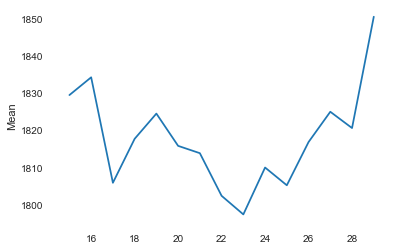

In [44]:
plt.plot(quantiles_range['Mean'])
plt.ylabel('Mean')
#axes = plt.gca()
#axes.set_xlim([0,2500])
#axes.set_ylim([1800,1850])
plt.show()

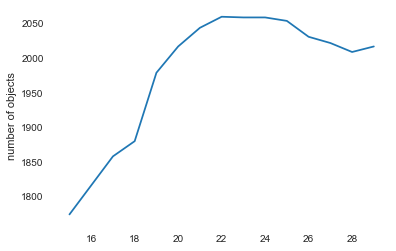

In [45]:
plt.plot(quantiles_range['nr_objects'])
plt.ylabel('number of objects')
#axes = plt.gca()
#axes.set_xlim([0,2500])
#axes.set_ylim([1500,2200])
plt.show()

In [ ]:
# plt.plot( 'log_date', 'Q1', data=quantiles_range, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
# plt.plot( 'log_date', 'Q2', data=quantiles_range, marker='', color='olive', linewidth=2)
# plt.plot( 'log_date', 'Q3', data=quantiles_range, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
# plt.legend()

* with outlyers (min & max 5%)

* without outlyers (min & max 5%)

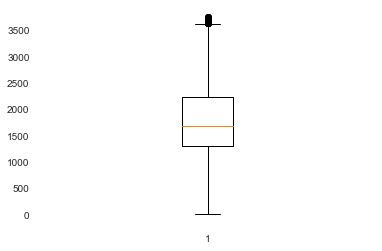

In [46]:
plt.boxplot(df['price_sq_m'])
plt.show()

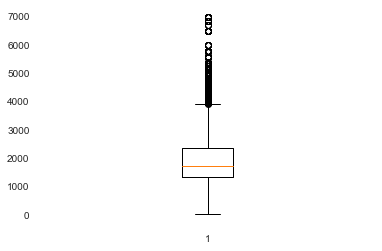

In [47]:
plt.boxplot(df_raw['price_sq_m'])
plt.show()

## Creation of data buckets for further analysis
* 3 Different apartment size buckets will be investigated:
  * < ~46 square meters. Small apartment category.
  * 45 to 66 square meters. Medium apartment category.
  * 66 to 120 square meters. Large apartment category.
* Categorization built based on Quantile-based discretization function towards three splits.

In [48]:
df['size_bucket'] = pd.qcut(df['space_sq_m'], q=3, labels=["small", "medium", "large"])
df.groupby('size_bucket').aggregate(np.mean)

ID         year    total_price   price_sq_m  nr_rooms  \
size_bucket                                                          
small       NaN  1976.031109   55812.967185  1698.947817  1.428299   
medium      NaN  1987.523252  102383.832909  1825.612293  2.375598   
large       NaN  1988.883483  163517.909073  1929.796905  3.202084   

             space_sq_m     floor  nr_floors     state  type       week  
size_bucket                                                              
small         32.380456  3.191470   5.208731  1.840743   1.0  22.084094  
medium        56.196790  3.594485   6.138394  1.914419   1.0  22.249720  
large         83.711118  3.486700   5.686154  1.863255   1.0  22.133003

#### Average supply per apartment size

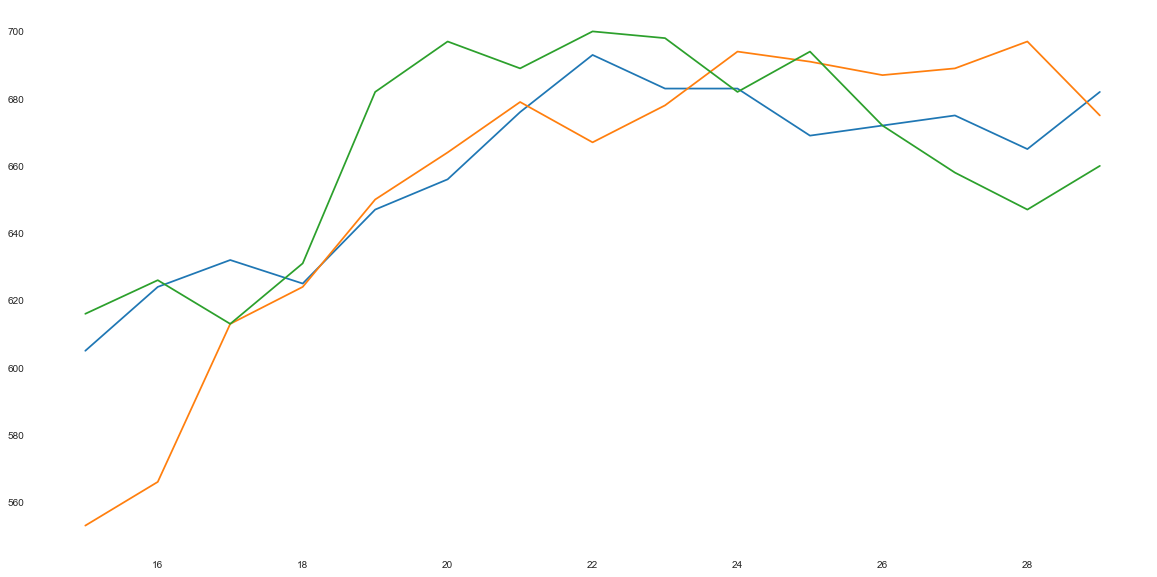

In [49]:
#df_small_app = df[df['size_bucket']=='9.999, 45.84'] 
size_bucket_data = df.groupby(['size_bucket', 'week'])['price_sq_m'].agg(['mean', 'count'])
size_bucket_data = size_bucket_data.reset_index(level=['size_bucket', 'week'])
size_bucket_data = size_bucket_data.set_index('week')
size_bucket_data.head()
size_bucket_data2 = size_bucket_data[size_bucket_data['size_bucket'] == 'large']
size_bucket_data2
plt.figure(figsize=(20,10))
plt.plot(size_bucket_data[size_bucket_data['size_bucket'] == 'large']['count'])
plt.plot(size_bucket_data[size_bucket_data['size_bucket'] == 'medium']['count'])
plt.plot(size_bucket_data[size_bucket_data['size_bucket'] == 'small']['count'])

#plt.ylabel('Mean')
#axes = plt.gca()
#axes.set_xlim([0,2500])
#axes.set_ylim([0,700])

plt.show()

#### Average price sq m per apartment size

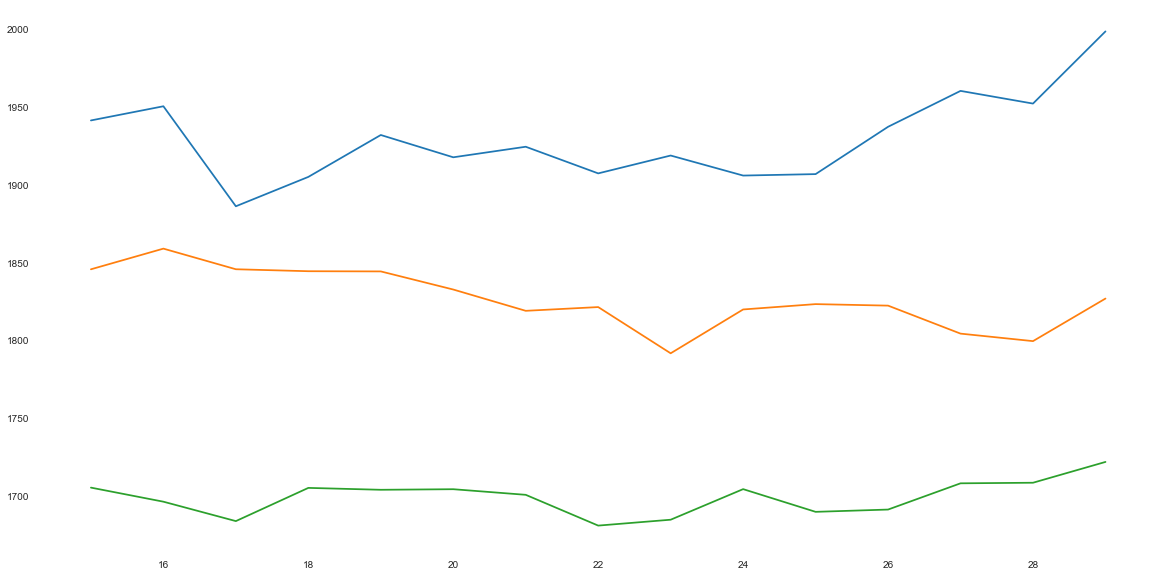

In [50]:
#df_small_app = df[df['size_bucket']=='9.999, 45.84'] 
size_bucket_data = df.groupby(['size_bucket', 'week'])['price_sq_m'].agg(['mean', 'count'])
size_bucket_data = size_bucket_data.reset_index(level=['size_bucket', 'week'])
size_bucket_data = size_bucket_data.set_index('week')
size_bucket_data.head()
size_bucket_data2 = size_bucket_data[size_bucket_data['size_bucket'] == 'large']
size_bucket_data2
plt.figure(figsize=(20,10))
plt.plot(size_bucket_data[size_bucket_data['size_bucket'] == 'large']['mean'])
plt.plot(size_bucket_data[size_bucket_data['size_bucket'] == 'medium']['mean'])
plt.plot(size_bucket_data[size_bucket_data['size_bucket'] == 'small']['mean'])

#plt.ylabel('Mean')
#axes = plt.gca()
#axes.set_xlim([0,2500])
#axes.set_ylim([0,700])

plt.show()

## District & street Rankings

In [52]:
#street ranking calculation
streets = df.groupby('street')['price_sq_m'].agg(['mean'])
streets['street_rank'] = pd.qcut(streets['mean'], q=10)
#district ranking calculation
districts = df.groupby('district')['price_sq_m'].agg(['mean'])
districts['district_rank'] = pd.qcut(districts['mean'], q=10)
                               
df = pd.merge(df, districts['district_rank'], on='district', how='outer')
df = pd.merge(df, streets['street_rank'], on='street', how='outer')

In [53]:
df.head()

#districts.head
# districts_ranked = df.groupby('district_rank')['price_sq_m'].agg(['count','mean'])
# districts_ranked['district_rank2'] = pd.qcut(districts_ranked['mean'], q=10)
# districts_ranked.sort_values(by=['district_rank'])


ID   log_date    district  year  total_price    street  price_sq_m  \
0 NaN 2020-04-09  Antakalnis  2018       130000  Ajerų g.      1143.0   
1 NaN 2020-04-15  Antakalnis  2018       130000  Ajerų g.      1143.0   
2 NaN 2020-04-22  Antakalnis  2018       130000  Ajerų g.      1143.0   
3 NaN 2020-04-28  Antakalnis  2018       130000  Ajerų g.      1143.0   
4 NaN 2020-05-08  Antakalnis  2018       130000  Ajerų g.      1143.0   

   nr_rooms  space_sq_m  floor  nr_floors  state  type  week size_bucket  \
0         4      113.69      1          2      1     1    15       large   
1         4      113.69      1          2      1     1    16       large   
2         4      113.69      1          2      1     1    17       large   
3         4      113.69      1          2      1     1    18       large   
4         4      113.69      1          2      1     1    19       large   

          district_rank           street_rank  
0  (1962.233, 2081.146]  (1031.195, 1263.299]  
1  (1962.233, 2081.146]  (1031.195, 1263.299]  
2  (1962.233, 2081.146]  (1031.195, 1263.299]  
3  (1962.233, 2081.146]  (1031.195, 1263.299]  
4  (1962.233, 2081.146]  (1031.195, 1263.299]

In [13]:
# #df['space_sq_m']
# #df = df.reset_index()
# df['size_bucket'] = df.apply(define_size_bucket, axis=1)
# #df2['district_bucket'] = df2.apply(define_district_bucket, axis=1)

In [39]:
# #buckets calculation:
# apartment_sizes = df.groupby(['size_bucket', 'log_date']).aggregate(np.mean)
# apartment_sizes = apartment_sizes.sort_values(by=['price_sq_m'], ascending=False)
# apartment_sizes.reset_index(inplace=True)  
# apartment_sizes = apartment_sizes.set_index('log_date')
# apartment_sizes.sort_index
# #apartment_sizes

In [37]:


# #small_ap = apartment_sizes[apartment_sizes['size_bucket']==1]
# #small_ap
# plt.plot(apartment_sizes['price_sq_m'][apartment_sizes['size_bucket']==3], label='1')
# #line_down = plt.plot(apartment_sizes['price_sq_m'][apartment_sizes['size_bucket']==2], label='2')
# #plt.legend([line_up, line_down]
# #plt.plot(apartment_sizes['price_sq_m'][apartment_sizes['size_bucket']==3], label='3')
# #plt.plot(apartment_sizes['price_sq_m'][apartment_sizes['size_bucket']==4], label='4')
# #plt.plot(apartment_sizes['price_sq_m'][apartment_sizes['size_bucket']==5], label='5')
# #plt.ylabel('Mean')
# plt.show()
# #apartment_sizes['price_sq_m'][apartment_sizes['size_bucket']==1]

                                    

In [15]:
#apartment_sizes['price_sq_m'][apartment_sizes['size_bucket']==1]

## Correlation initial Analysis

In [56]:
df.columns
potentialFeatures = [ 'year', 'total_price',
       'price_sq_m',  'nr_rooms', 'space_sq_m',
        'floor', 'nr_floors', 'state', 'type']
    #   'size_bucket', 'district_rank', 'street_rank']
# check how the features are correlated with the price  sq m
for f in potentialFeatures:
    related = df['price_sq_m'].corr(df[f])
    print("%s: %f" % (f,related))

year: 0.145057
total_price: 0.726160
price_sq_m: 1.000000
nr_rooms: 0.091049
space_sq_m: 0.173725
floor: -0.030916
nr_floors: -0.045669
state: 0.148122
type: nan


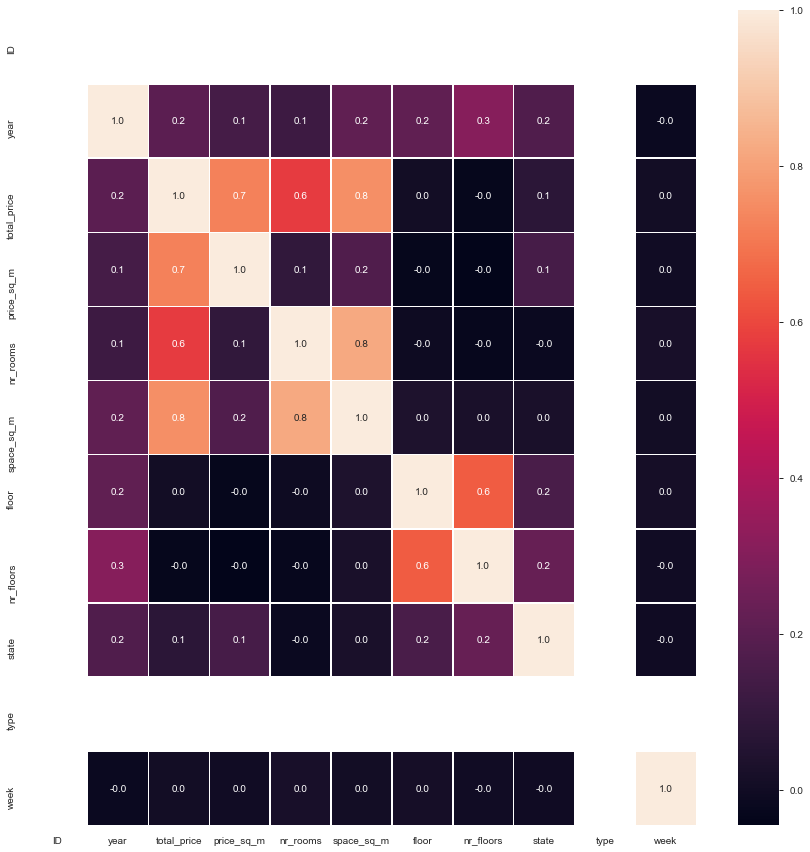

In [57]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

C:\Users\tiesi\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


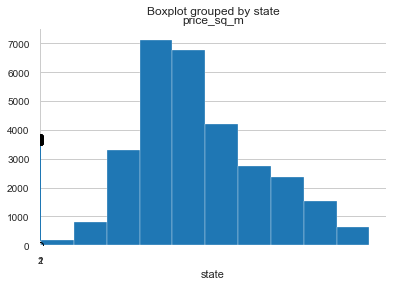

In [58]:
df.boxplot(column='price_sq_m', by='state')
df.price_sq_m.hist()

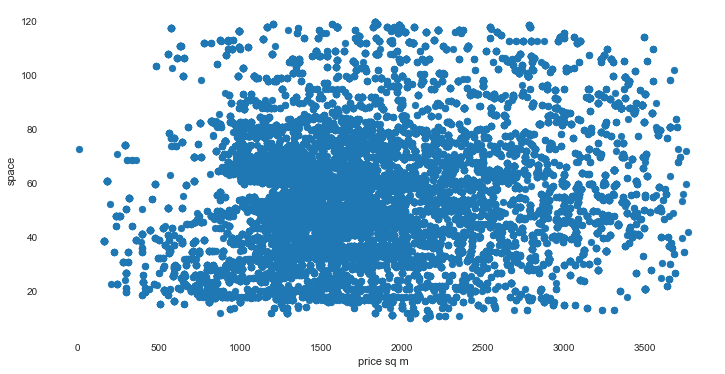

In [59]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df['price_sq_m'], df['space_sq_m'])
ax.set_xlabel('price sq m')
ax.set_ylabel('space')
plt.show()

# Map work

In [30]:
import geopandas as gpd
import osmnx as ox
import networkx

Vilnius_map = "Vilnius,Lithuania"
graph = ox.graph_from_place(Vilnius_map)
networkx.classes.multidigraph.MultiDiGraph

nodes , streets_gdf = ox.graph_to_gdfs(graph)

<IPython.core.display.Javascript object>


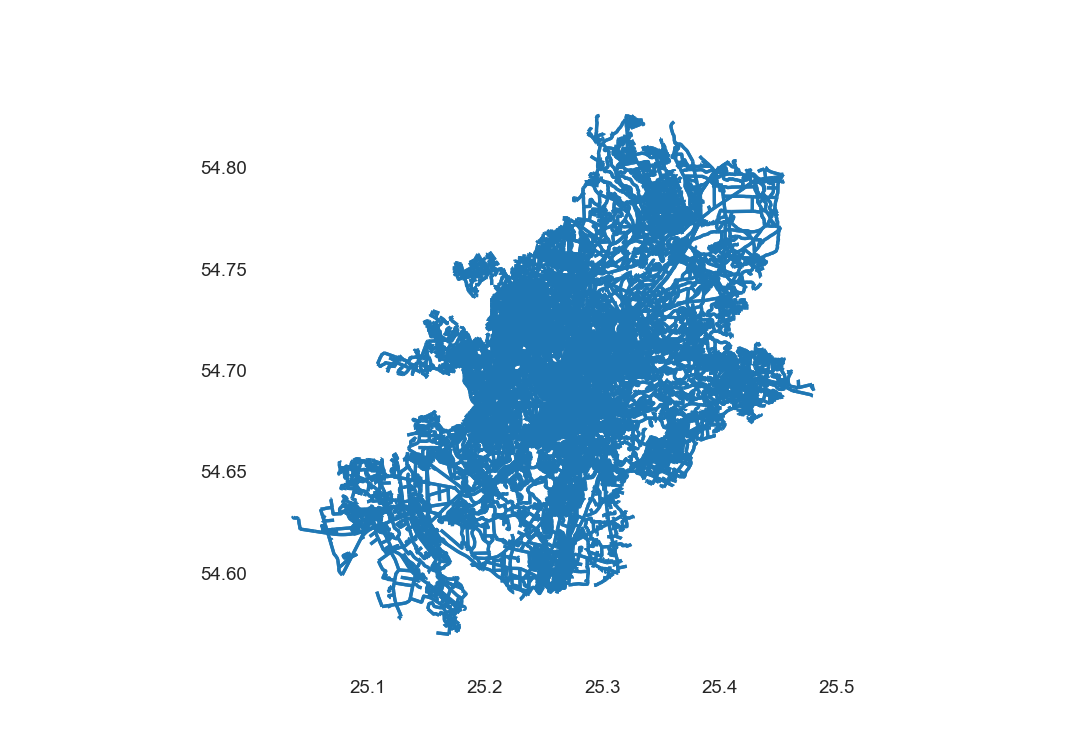

In [50]:
#streets.head()
#streets_gdf.head()
#streets_gdf = pd.merge(streets_gdf, streets['mean'], left_on='name', right_on='left')


fig2 =streets_gdf.plot()
#fig2 = plt.figure(figsize=(15,10))
#fig2.show()

osmid               name       highway  oneway   length   service  \
0  210992803     Kaniaviškių g.   residential   False   29.661       NaN   
1  210992803     Kaniaviškių g.   residential   False  123.459       NaN   
2  701261457                NaN       service   False   71.096  driveway   
3  701261457                NaN       service   False   71.096  driveway   
4  210992802  Kazio Bizausko g.  unclassified   False   33.843       NaN   

  maxspeed                                           geometry lanes  ref  \
0      NaN  LINESTRING (25.39225 54.67607, 25.39271 54.67609)   NaN  NaN   
1      NaN  LINESTRING (25.39225 54.67607, 25.39034 54.67596)   NaN  NaN   
2      NaN  LINESTRING (25.39225 54.67607, 25.39233 54.67543)   NaN  NaN   
3      NaN  LINESTRING (25.39233 54.67543, 25.39225 54.67607)   NaN  NaN   
4       50  LINESTRING (25.39792 54.67697, 25.39787 54.67727)   NaN  NaN   

  tunnel access bridge width junction           u           v  key  
0    NaN    NaN    NaN   NaN      NaN  6585974785  5632274275    0  
1    NaN    NaN    NaN   NaN      NaN  6585974785  4648073626    0  
2    NaN    NaN    NaN   NaN      NaN  6585974785  6585974786    0  
3    NaN    NaN    NaN   NaN      NaN  6585974786  6585974785    0  
4    NaN    NaN    NaN   NaN      NaN  6585974787  4587639180    0

Code below is either not used or to be used later:

In [ ]:
#Skewness
# -1 / + 1 is considered regular
print(df['price_sq_m'].skew())
df['price_sq_m'].describe()

In [ ]:
#Outlier treatment
#Quantile-based Flooring and Capping
Q1 = df['price_sq_m'].quantile(0.05)
Q3 = df['price_sq_m'].quantile(0.95)
print(Q1)
print(Q3)


data_1 = df[df['price_sq_m'] > Q1]
data_1 = df[df['price_sq_m'] < Q3]
print(data_1.shape)
#skewness differences
print(df['price_sq_m'].skew())
print(data_1['price_sq_m'].skew())


In [ ]:
#trimming
index = data[(data1['price_sq_m'] >= 3156.0)|(data['price_sq_m'] <= 1113.19)].index
data.drop(index, inplace=True)
data['price_sq_m'].describe()

In [ ]:
#IQR Score
#The rule of thumb is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed.
df3 = df['price_sq_m']

df_out = df3[~((df3 < (Q1 - 1.5 * IQR)) |(data1 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

In [183]:
#date calculations
period = data_1.groupby('log_date').aggregate(np.mean)
period.head(5)

is_new_project  reserved  price_change  is_auction  nr_stars  \
log_date                                                                   
2020-04-09        0.068239  0.016792      0.039741    0.023580  0.440157   
2020-04-10        0.069414  0.016269      0.040334    0.024223  0.438539   
2020-04-11        0.065789  0.016003      0.039469    0.021693  0.390825   
2020-04-12        0.067116  0.015980      0.039712    0.021662  0.348722   
2020-04-13        1.000000  1.000000      0.040013    1.000000  0.322557   

                   year    total_price   price_sq_m  rounded_price_sq_m  \
log_date                                                                  
2020-04-09  1996.252233  122150.586995  1911.601286         1913.504823   
2020-04-10  1996.203181  121593.971800  1909.622560         1911.641359   
2020-04-11  1996.438122  122126.564367  1913.283428         1915.291607   
2020-04-12  1996.610440  122044.691761  1913.732244         1915.838068   
2020-04-13  1996.307112  121843.280532  1912.396911         1914.547414   

            nr_rooms  space_sq_m  rounded_space_sq_m     floor  nr_floors  \
log_date                                                                    
2020-04-09  2.467310   62.572008           62.574848  3.389425   6.643087   
2020-04-10  2.461678   62.394624           62.398771  3.392986   6.654736   
2020-04-11  2.466572   62.544733           62.548720  3.403627   6.656117   
2020-04-12  2.463778   62.482724           62.486506  3.400568   6.658026   
2020-04-13  2.459770   62.463696           62.465876  3.418822   6.672055   

               state  type  size_bucket  
log_date                                 
2020-04-09  1.635584   1.0     2.964987  
2020-04-10  1.626537   1.0     2.954447  
2020-04-11  1.636913   1.0     2.964794  
2020-04-12  1.634233   1.0     2.960582  
2020-04-13  1.642960   1.0     2.958693

In [ ]:

# # district buckets:
# first_tier =['Senamiestis','Žvėrynas','Užupis', 'Filaretai']
# second_tier = ['Valakampiai','Naujamiestis', 'Šnipiškės','Turniškės']
# third_tier = ['Antakalnis', 'Šiaurės miestelis','Žirmūnai', 'Burbiškės', 'Visoriai',
#             'Avižienių k.', 'Tarandės k.', 'Verkiai','Markučiai','Santariškės', 'Saulėtekis']
# fourth_tier = ['Klevinės vs.','Baltupiai','Bajorai','Lazdynėliai','Pilaitė',
# 'Šeškinė','Viršuliškės','Jeruzalė','Vilkpėdė','Liepkalnis','Karoliniškės','Pašilaičiai','Rasos',
# 'Lazdynai','Dvarčionys','Avižieniai','Justiniškės','Bendorių k.','Kalnėnai','Fabijoniškės',
# 'Bukiškio k.','Tarandė','Skaidiškės','Bukčiai','Balsiai','Naujininkai']

# def define_district_bucket(df2):
#   if df2['district'] in first_tier:
#     return 1
#   elif df2['district'] in second_tier:
#     return 2
#   elif df2['district'] in third_tier:
#     return 3
#   elif df2['district'] in fourth_tier:
#     return 4
#   else:
#     return 5

# df2['size_bucket'] =  
# 		,CASE	WHEN a.space_sq_m < 30  THEN 1
# 				WHEN a.space_sq_m >= 30 and a.space_sq_m < 50 THEN 2
# 				WHEN a.space_sq_m >= 50 and a.space_sq_m < 70 THEN 3
# 				WHEN a.space_sq_m >= 70 and a.space_sq_m < 90 THEN 4
# 				ELSE 5
# 				END AS [size_bucket]
                
#    if col[:2]=='01':
#         df.rename(columns={col:'Gold' + col[4:]}, inplace=True)
#     if col[:2]=='02':
#         df.rename(columns={col:'Silver' + col[4:]}, inplace=True)
#     if col[:2]=='03':
#         df.rename(columns={col:'Bronze' + col[4:]}, inplace=True)
#     if col[:1]=='№':
#         df.rename(columns={col:'#' + col[1:]}, inplace=True) 
                

In [ ]:
# apartment size buckets:
def define_size_bucket(df):
  if df['space_sq_m'] < 30.0:
    return 1
  elif df['space_sq_m'] > 30.0 and df['space_sq_m']< 55.0:
    return 2
  elif df['space_sq_m'] > 55.0 and df['space_sq_m']< 70.0:
    return 3
  elif df['space_sq_m'] > 70.0 and df['space_sq_m']< 90.0:
    return 4
  else:
    return 5

In [ ]:
#street ranking calculation
streets = df.groupby('street').aggregate(np.mean)
streets
streets = streets.sort_values(by=['price_sq_m'], ascending=False)
streets = streets.reset_index()
streets['street_rank'] = streets.index
streets = streets[['street','street_rank']]

#district ranking calculation
districts = df.groupby('district').aggregate(np.mean)
districts = districts.sort_values(by=['price_sq_m'], ascending=False)
districts = districts.reset_index()
districts['district_rank'] = districts.index
districts = districts[['district','district_rank']]

df = pd.merge(df, districts, on='district', how='outer')
df = pd.merge(df, streets, on='street', how='outer')
